In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import Counter
#import the necessary libraries required 
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
import copy

In [2]:
#import data and view
data_origin = pd.read_csv("../db/cordova_FeatureSet.csv", skipinitialspace=True)
data_origin

,apk_name,u_battery-status,u_camera,u_contacts,u_device,u_dialogs,u_file,u_geolocation,u_globalization,u_inappbrowser,...,android.permission.ACCESS_Nandroid.intent.action.MAINETWORK_STATE,se.bodytimeline.boston.permission.C2D_MESSAGE,sk.creativeweb.zlavadna.permission.C2D_MESSAGE,softways.mobile.masoutis.permission.C2D_MESSAGE,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,uk.org.sas.sewagealert.permission.C2D_MESSAGE,wecotec.vfl1848_4.permission.C2D_MESSAGE,wtdt.resgrid.andriod.permission.C2D_MESSAGE,yonatan.benmoshe.permission.C2D_MESSAGE
0,1,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,101,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,102,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,za.co.snapplify.completecookery,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2655,za.co.snapplify.garfield,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2656,za.co.snapplify.lowveldliving,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2657,za.co.snapplify.purpleturtle,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data_virustool = pd.read_csv("../db/data_virustool.csv", skipinitialspace=True)
data_virustool

,_id,apk_name,package_name,ml_permission,ml_origin,ml_plugin,ml_virus,malicious,undetected,malware
0,{'$oid': '6080b68132fda25f88a14613'},Bau Magazine_1.3.2.apk,at.wohnnet.kiosk.android,"['android.permission.INTERNET', 'android.permi...",['origin~~*'],[],[],0,0,0
1,{'$oid': '6080b68132fda25f88a14614'},BorusanPortMobile_1.1.apk,app.id_df3851c64dc64001a2ddc130894c2519,"['android.permission.INTERNET', 'android.permi...",['origin~~*'],[],[],0,0,0
2,{'$oid': '6080b68132fda25f88a14615'},Camping Corones_0.1.apk,at.generalsolutions.contwise.maps.camping_corones,"['android.permission.INTERNET', 'android.permi...",['origin~~*'],[],[],0,0,0
3,{'$oid': '6080b68132fda25f88a14616'},Camping Mals_0.0.24.apk,at.generalsolutions.contwise.maps.camping_mals,"['android.permission.INTERNET', 'android.permi...",['origin~~*'],[],[],0,0,0
4,{'$oid': '6080b68132fda25f88a14617'},Contwise LISA_3.3.apk,at.generalsolutions.contwise.maps.bergrettung,"['android.permission.CAMERA', 'android.permiss...",[],[],[],0,0,0
...,...,...,...,...,...,...,...,...,...,...
3141,{'$oid': '6080b68232fda25f88a15258'},com.frontera.puntaarenas2.apk,com.frontera.puntaarenas2,"['android.permission.ACCESS_COARSE_LOCATION', ...","['origin~~http://127.0.0.1*', 'origin~~*.*']","['App', 'org.apache.cordova.App', 'Geolocation...",[],0,0,0
3142,{'$oid': '6080b68232fda25f88a15259'},off.guide.maps.thailand.apk,off.guide.maps.thailand,"['android.permission.ACCESS_COARSE_LOCATION', ...",['origin~~*'],[],[],0,0,0
3143,{'$oid': '6080b68232fda25f88a1525a'},off.guide.maps.mexico.apk,off.guide.maps.mexico,"['android.permission.ACCESS_COARSE_LOCATION', ...",['origin~~*'],[],[],0,0,0
3144,{'$oid': '6080b68232fda25f88a1525b'},off.guide.maps.india.apk,off.guide.maps.india,"['android.permission.ACCESS_COARSE_LOCATION', ...",['origin~~*'],[],[],0,0,0


# Data Preprocessing

## Combine Dataset

In [4]:
df = data_origin.copy()
df.head()

,apk_name,u_battery-status,u_camera,u_contacts,u_device,u_dialogs,u_file,u_geolocation,u_globalization,u_inappbrowser,...,android.permission.ACCESS_Nandroid.intent.action.MAINETWORK_STATE,se.bodytimeline.boston.permission.C2D_MESSAGE,sk.creativeweb.zlavadna.permission.C2D_MESSAGE,softways.mobile.masoutis.permission.C2D_MESSAGE,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,uk.org.sas.sewagealert.permission.C2D_MESSAGE,wecotec.vfl1848_4.permission.C2D_MESSAGE,wtdt.resgrid.andriod.permission.C2D_MESSAGE,yonatan.benmoshe.permission.C2D_MESSAGE
0,1,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,101,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,102,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_virustool["apk_name_filter"] = data_virustool["apk_name"].apply(lambda x: x[:-4])
data_virustool

,_id,apk_name,package_name,ml_permission,ml_origin,ml_plugin,ml_virus,malicious,undetected,malware,apk_name_filter
0,{'$oid': '6080b68132fda25f88a14613'},Bau Magazine_1.3.2.apk,at.wohnnet.kiosk.android,"['android.permission.INTERNET', 'android.permi...",['origin~~*'],[],[],0,0,0,Bau Magazine_1.3.2
1,{'$oid': '6080b68132fda25f88a14614'},BorusanPortMobile_1.1.apk,app.id_df3851c64dc64001a2ddc130894c2519,"['android.permission.INTERNET', 'android.permi...",['origin~~*'],[],[],0,0,0,BorusanPortMobile_1.1
2,{'$oid': '6080b68132fda25f88a14615'},Camping Corones_0.1.apk,at.generalsolutions.contwise.maps.camping_corones,"['android.permission.INTERNET', 'android.permi...",['origin~~*'],[],[],0,0,0,Camping Corones_0.1
3,{'$oid': '6080b68132fda25f88a14616'},Camping Mals_0.0.24.apk,at.generalsolutions.contwise.maps.camping_mals,"['android.permission.INTERNET', 'android.permi...",['origin~~*'],[],[],0,0,0,Camping Mals_0.0.24
4,{'$oid': '6080b68132fda25f88a14617'},Contwise LISA_3.3.apk,at.generalsolutions.contwise.maps.bergrettung,"['android.permission.CAMERA', 'android.permiss...",[],[],[],0,0,0,Contwise LISA_3.3
...,...,...,...,...,...,...,...,...,...,...,...
3141,{'$oid': '6080b68232fda25f88a15258'},com.frontera.puntaarenas2.apk,com.frontera.puntaarenas2,"['android.permission.ACCESS_COARSE_LOCATION', ...","['origin~~http://127.0.0.1*', 'origin~~*.*']","['App', 'org.apache.cordova.App', 'Geolocation...",[],0,0,0,com.frontera.puntaarenas2
3142,{'$oid': '6080b68232fda25f88a15259'},off.guide.maps.thailand.apk,off.guide.maps.thailand,"['android.permission.ACCESS_COARSE_LOCATION', ...",['origin~~*'],[],[],0,0,0,off.guide.maps.thailand
3143,{'$oid': '6080b68232fda25f88a1525a'},off.guide.maps.mexico.apk,off.guide.maps.mexico,"['android.permission.ACCESS_COARSE_LOCATION', ...",['origin~~*'],[],[],0,0,0,off.guide.maps.mexico
3144,{'$oid': '6080b68232fda25f88a1525b'},off.guide.maps.india.apk,off.guide.maps.india,"['android.permission.ACCESS_COARSE_LOCATION', ...",['origin~~*'],[],[],0,0,0,off.guide.maps.india


In [6]:
# targets = ["malicious", "undetected", "malware"]
# for t in targets:
#     df[t] = df["apk_name"].map(data_virustool.set_index("apk_name_filter")[t])

In [7]:
df["class"] = df["apk_name"].map(data_virustool.set_index("apk_name_filter")["malware"])
df

,apk_name,u_battery-status,u_camera,u_contacts,u_device,u_dialogs,u_file,u_geolocation,u_globalization,u_inappbrowser,...,se.bodytimeline.boston.permission.C2D_MESSAGE,sk.creativeweb.zlavadna.permission.C2D_MESSAGE,softways.mobile.masoutis.permission.C2D_MESSAGE,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,uk.org.sas.sewagealert.permission.C2D_MESSAGE,wecotec.vfl1848_4.permission.C2D_MESSAGE,wtdt.resgrid.andriod.permission.C2D_MESSAGE,yonatan.benmoshe.permission.C2D_MESSAGE,class
0,1,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,10,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,100,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,101,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,102,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,za.co.snapplify.completecookery,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2655,za.co.snapplify.garfield,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2656,za.co.snapplify.lowveldliving,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2657,za.co.snapplify.purpleturtle,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [8]:
df = df[df['class'].notna()]
df

,apk_name,u_battery-status,u_camera,u_contacts,u_device,u_dialogs,u_file,u_geolocation,u_globalization,u_inappbrowser,...,se.bodytimeline.boston.permission.C2D_MESSAGE,sk.creativeweb.zlavadna.permission.C2D_MESSAGE,softways.mobile.masoutis.permission.C2D_MESSAGE,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,uk.org.sas.sewagealert.permission.C2D_MESSAGE,wecotec.vfl1848_4.permission.C2D_MESSAGE,wtdt.resgrid.andriod.permission.C2D_MESSAGE,yonatan.benmoshe.permission.C2D_MESSAGE,class
0,1,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,10,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,100,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,101,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,102,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,za.co.snapplify.completecookery,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2655,za.co.snapplify.garfield,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2656,za.co.snapplify.lowveldliving,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2657,za.co.snapplify.purpleturtle,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [9]:
df["class"] = df["class"].astype(int)
df

<ipython-input-9-e601089f0356>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["class"] = df["class"].astype(int)


,apk_name,u_battery-status,u_camera,u_contacts,u_device,u_dialogs,u_file,u_geolocation,u_globalization,u_inappbrowser,...,se.bodytimeline.boston.permission.C2D_MESSAGE,sk.creativeweb.zlavadna.permission.C2D_MESSAGE,softways.mobile.masoutis.permission.C2D_MESSAGE,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,uk.org.sas.sewagealert.permission.C2D_MESSAGE,wecotec.vfl1848_4.permission.C2D_MESSAGE,wtdt.resgrid.andriod.permission.C2D_MESSAGE,yonatan.benmoshe.permission.C2D_MESSAGE,class
0,1,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,10,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,100,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,101,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,102,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,za.co.snapplify.completecookery,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2655,za.co.snapplify.garfield,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2656,za.co.snapplify.lowveldliving,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2657,za.co.snapplify.purpleturtle,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#check null value
data_origin.isnull().sum(axis = 0)

apk_name                                         0
u_battery-status                                 0
u_camera                                         0
u_contacts                                       0
u_device                                         0
                                                ..
com.android.email.permission.READ_ATTACHMENT     0
uk.org.sas.sewagealert.permission.C2D_MESSAGE    0
wecotec.vfl1848_4.permission.C2D_MESSAGE         0
wtdt.resgrid.andriod.permission.C2D_MESSAGE      0
yonatan.benmoshe.permission.C2D_MESSAGE          0
Length: 905, dtype: int64

In [11]:
#display the columns with the '?'
for i in df.columns:
    if '?' in df[i].unique().astype(str):
        print(i)
        print(df[i].value_counts())
        print('\n')

In [12]:
from collections import Counter
Counter(df['class'])

Counter({1: 964, 0: 1694})

In [13]:
df_pro = df.drop(columns=["apk_name"])
df_pro

,u_battery-status,u_camera,u_contacts,u_device,u_dialogs,u_file,u_geolocation,u_globalization,u_inappbrowser,u_media,...,se.bodytimeline.boston.permission.C2D_MESSAGE,sk.creativeweb.zlavadna.permission.C2D_MESSAGE,softways.mobile.masoutis.permission.C2D_MESSAGE,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,uk.org.sas.sewagealert.permission.C2D_MESSAGE,wecotec.vfl1848_4.permission.C2D_MESSAGE,wtdt.resgrid.andriod.permission.C2D_MESSAGE,yonatan.benmoshe.permission.C2D_MESSAGE,class
0,1,0,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2655,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2656,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2657,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Dataset for Model

## Split dataset

In [14]:
X = df_pro.drop(['class'], axis=1)
y = df_pro['class']
X

,u_battery-status,u_camera,u_contacts,u_device,u_dialogs,u_file,u_geolocation,u_globalization,u_inappbrowser,u_media,...,android.permission.ACCESS_Nandroid.intent.action.MAINETWORK_STATE,se.bodytimeline.boston.permission.C2D_MESSAGE,sk.creativeweb.zlavadna.permission.C2D_MESSAGE,softways.mobile.masoutis.permission.C2D_MESSAGE,com.android.email.permission.ACCESS_PROVIDER,com.android.email.permission.READ_ATTACHMENT,uk.org.sas.sewagealert.permission.C2D_MESSAGE,wecotec.vfl1848_4.permission.C2D_MESSAGE,wtdt.resgrid.andriod.permission.C2D_MESSAGE,yonatan.benmoshe.permission.C2D_MESSAGE
0,1,0,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2655,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2656,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2657,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#check for rand_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
#print(X_train.head())
#print(X_test.head())
#print(y_train.head())
#print(y_test.head())
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))


X_train shape (2126, 904) and size 1921904
X_test shape (532, 904) and size 480928
y_train shape (2126,) and size 2126
y_test shape (532,) and size 532


## Scaling data

In [16]:
#Standardize training and test datasets.
#==============================================================================
# Feature scaling is to bring all the independent variables in a dataset into
# same scale, to avoid any variable dominating  the model. Here we will not 
# transform the dependent variables.
#==============================================================================
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[-1.67631615 -1.03057055 -0.7269091  ... -0.02169305 -0.02169305
  -0.02169305]
 [ 0.59654618  0.97033629 -0.7269091  ... -0.02169305 -0.02169305
  -0.02169305]
 [-1.67631615  0.97033629 -0.7269091  ... -0.02169305 -0.02169305
  -0.02169305]
 [ 0.59654618  0.97033629 -0.7269091  ... -0.02169305 -0.02169305
  -0.02169305]
 [ 0.59654618 -1.03057055 -0.7269091  ... -0.02169305 -0.02169305
  -0.02169305]]
test data
[[-1.67631615 -1.03057055 -0.7269091  ... -0.02169305 -0.02169305
  -0.02169305]
 [-1.67631615 -1.03057055 -0.7269091  ... -0.02169305 -0.02169305
  -0.02169305]
 [ 0.59654618  0.97033629 -0.7269091  ... -0.02169305 -0.02169305
  -0.02169305]
 [ 0.59654618 -1.03057055 -0.7269091  ... -0.02169305 -0.02169305
  -0.02169305]
 [ 0.59654618  0.97033629 -0.7269091  ... -0.02169305 -0.02169305
  -0.02169305]]


# ML Model

In [17]:
# One Hot Encoding
feature = pd.get_dummies(X)
# List of features for later use
feature_list = list(feature.columns)
features_num = np.size(feature_list)
# Convert to numpy arrays
features = np.array(feature)
print("features numbers: ", features_num)

features numbers:  904


In [18]:
from sklearn.metrics import accuracy_score, f1_score

#model apply
# ntree_list = [10, 20, 50, 100, 200, 500, 1000]
ntree_list = [10, 20, 50, 100, 200, 500, 1000]
mtry_list = [int(0.5*features_num**0.5), int(features_num**0.5), int(2*features_num**0.5)]
best_ntree = 0
best_mtry = 0
best_accuracy = 0
best_f1 = 0
best_model = None
best_y_pred = 0
count = 0
total_models = len(ntree_list) * len(mtry_list)
l_accuracy = []
l_f1 = []
l_ntry_mtree = []
l_model = []
for ntree in ntree_list:
    for mtry in mtry_list:
        count += 1
        print("Training model %i out of %i..." % (count, total_models))
        print("ntree: %i, mtry: %i" % (ntree, mtry))
        l_ntry_mtree.append((ntree, mtry))
        rfc = RandomForestClassifier(n_estimators=ntree,
                                      max_features=mtry,
                                      bootstrap = True,
                                      random_state=0)
        rfc.fit(X_train, y_train)
        l_model.append(rfc)
        # predict the test dataset
        y_pred = rfc.predict(X_test)
        # compute square root error
        accuracy = accuracy_score(y_test, y_pred)
        l_accuracy.append(accuracy)
        f1 = f1_score(y_test, y_pred, average="binary")
        l_f1.append(f1)
        if best_f1 < f1:
            best_ntree = ntree
            best_mtry = mtry
            best_f1 = f1
            best_model = rfc
            print("Found new optimal model")
            print(best_model)
            print("The f1_score of model RFR : %6f" % best_f1)
            print("The accuracy of model RFR : %6f" % accuracy)
            print("best_ntree: %i, best_mtry: %i" % (best_ntree, best_mtry))
            print("========================================================================")    
#print optimal results
print("========================================================================")
print('Finished tuning model')
print('Optimal model')
print(best_model)
print("The f1_score of model RFR : %6f" % best_f1)
print("best_ntree: %i, best_mtry: %i" % (best_ntree, best_mtry))

Training model 1 out of 21...
ntree: 10, mtry: 15
Found new optimal model
RandomForestClassifier(max_features=15, n_estimators=10, random_state=0)
The f1_score of model RFR : 0.617737
The accuracy of model RFR : 0.765038
best_ntree: 10, best_mtry: 15
Training model 2 out of 21...
ntree: 10, mtry: 30
Found new optimal model
RandomForestClassifier(max_features=30, n_estimators=10, random_state=0)
The f1_score of model RFR : 0.626506
The accuracy of model RFR : 0.766917
best_ntree: 10, best_mtry: 30
Training model 3 out of 21...
ntree: 10, mtry: 60
Found new optimal model
RandomForestClassifier(max_features=60, n_estimators=10, random_state=0)
The f1_score of model RFR : 0.639752
The accuracy of model RFR : 0.781955
best_ntree: 10, best_mtry: 60
Training model 4 out of 21...
ntree: 20, mtry: 15
Training model 5 out of 21...
ntree: 20, mtry: 30
Training model 6 out of 21...
ntree: 20, mtry: 60
Training model 7 out of 21...
ntree: 50, mtry: 15
Training model 8 out of 21...
ntree: 50, mtry: 

# Result Visualization

## Consfusion Matrix for the Classifier 

<Figure size 360x360 with 0 Axes>

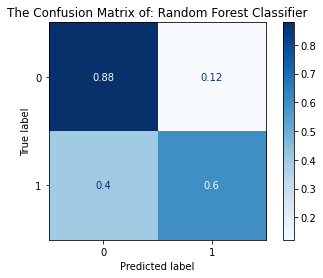

In [19]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(5,5))
disp = plot_confusion_matrix(best_model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("The Confusion Matrix of: %s" % "Random Forest Classifier")
plt.show()

## Accuracy, F1-Score

In [20]:
d_result = {
    "models": l_model,
    "accuracy": l_accuracy,
    "f1-score": l_f1
}

In [21]:
df_result = pd.DataFrame.from_dict(d_result)
df_result

,models,accuracy,f1-score
0,"(DecisionTreeClassifier(max_features=15, rando...",0.765038,0.617737
1,"(DecisionTreeClassifier(max_features=30, rando...",0.766917,0.626506
2,"(DecisionTreeClassifier(max_features=60, rando...",0.781955,0.639752
3,"(DecisionTreeClassifier(max_features=15, rando...",0.770677,0.625767
4,"(DecisionTreeClassifier(max_features=30, rando...",0.776316,0.638298
5,"(DecisionTreeClassifier(max_features=60, rando...",0.774436,0.629630
6,"(DecisionTreeClassifier(max_features=15, rando...",0.774436,0.634146
7,"(DecisionTreeClassifier(max_features=30, rando...",0.781955,0.641975
8,"(DecisionTreeClassifier(max_features=60, rando...",0.785714,0.652439
9,"(DecisionTreeClassifier(max_features=15, rando...",0.780075,0.637771


In [22]:
df_result.style.background_gradient(cmap='Blues')

,models,accuracy,f1-score
0,"RandomForestClassifier(max_features=15, n_estimators=10, random_state=0)",0.765038,0.617737
1,"RandomForestClassifier(max_features=30, n_estimators=10, random_state=0)",0.766917,0.626506
2,"RandomForestClassifier(max_features=60, n_estimators=10, random_state=0)",0.781955,0.639752
3,"RandomForestClassifier(max_features=15, n_estimators=20, random_state=0)",0.770677,0.625767
4,"RandomForestClassifier(max_features=30, n_estimators=20, random_state=0)",0.776316,0.638298
5,"RandomForestClassifier(max_features=60, n_estimators=20, random_state=0)",0.774436,0.629630
6,"RandomForestClassifier(max_features=15, n_estimators=50, random_state=0)",0.774436,0.634146
7,"RandomForestClassifier(max_features=30, n_estimators=50, random_state=0)",0.781955,0.641975
8,"RandomForestClassifier(max_features=60, n_estimators=50, random_state=0)",0.785714,0.652439
9,"RandomForestClassifier(max_features=15, random_state=0)",0.780075,0.637771


## Feature Importance

In [23]:
# Get numerical feature importances
importances = list(best_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse=True)
# Print out the feature and importances 
[print('Variable: {:30}    Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: android.permission.READ_PHONE_STATE    Importance: 0.05
Variable: android.permission.GET_ACCOUNTS    Importance: 0.04
Variable: u_network-information             Importance: 0.03
Variable: u_splashscreen                    Importance: 0.03
Variable: d_inappbrowser                    Importance: 0.03
Variable: android.permission.BROADCAST_STICKY    Importance: 0.03
Variable: android.permission.VIBRATE        Importance: 0.03
Variable: u_battery-status                  Importance: 0.02
Variable: u_camera                          Importance: 0.02
Variable: u_dialogs                         Importance: 0.02
Variable: u_geolocation                     Importance: 0.02
Variable: u_globalization                   Importance: 0.02
Variable: u_media                           Importance: 0.02
Variable: u_media-capture                   Importance: 0.02
Variable: d_battery-status                  Importance: 0.02
Variable: d_contacts                        Importance: 0.02
Variable: d_g

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [32]:
def features(feature_importances, tops):
    # sorted importances of features
    
    feature_importances = feature_importances[:tops]
    feature_list = [x[0] for x in feature_importances][::-1]
    importances = [x[1] for x in feature_importances][::-1]
    # list of x locations for plotting
    y_values = list(range(len(importances)))
    # Make a bar chart
    plt.figure(figsize=(15, 12), dpi=80)
    plt.barh(y_values, importances, orientation = 'horizontal', color = 'lightblue', edgecolor = 'k', linewidth = 1.2)
    # Tick labels for x axis
    plt.yticks(y_values, feature_list, rotation='horizontal')
    # Axis labels and title
    fontsize=20
    plt.tick_params(axis='x', labelsize=fontsize)
    plt.xlabel('Importance', fontsize=fontsize) 
    plt.ylabel('Feature', fontsize=fontsize)
    plt.title(f'Feature Importance of Top {tops}', fontsize=fontsize)
#     params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large'}
#     plt.rcParams.update(params)
    plt.show()

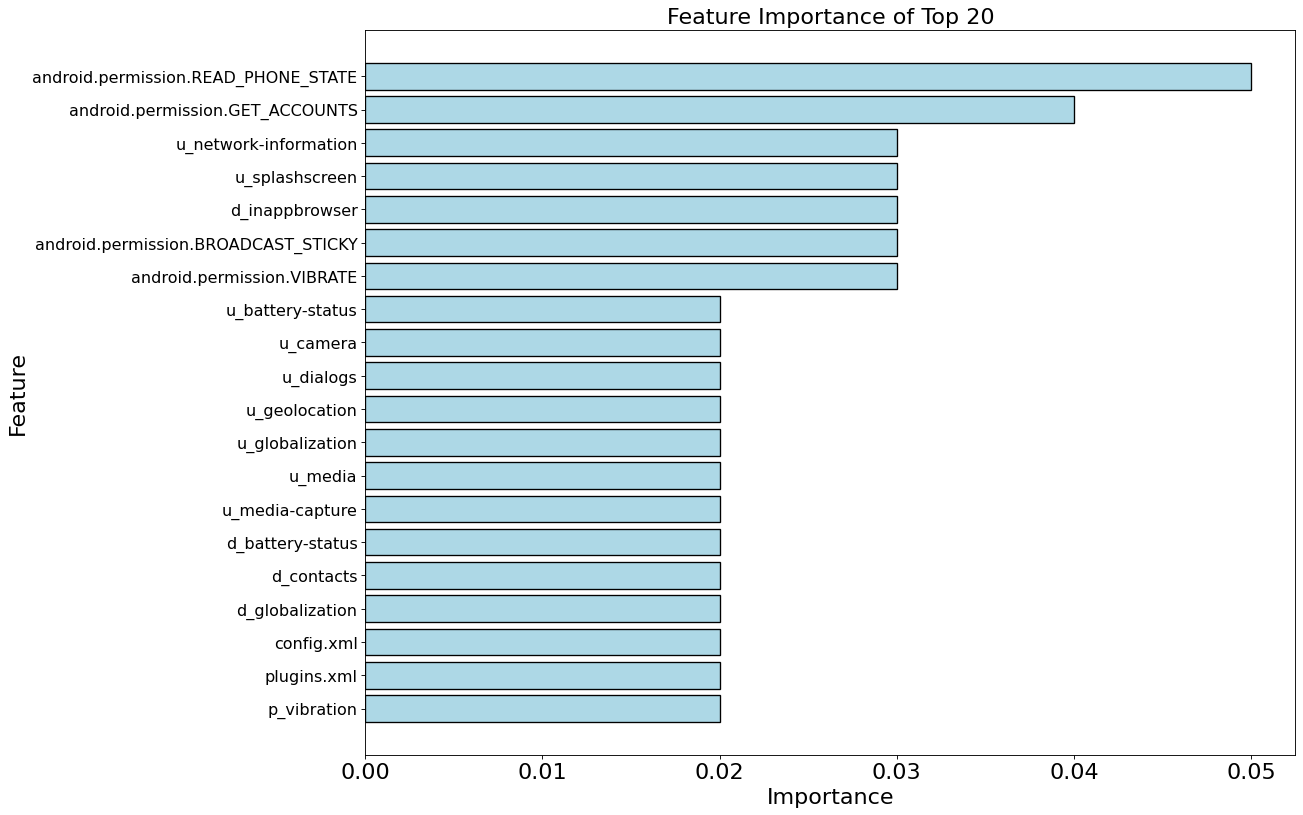

In [33]:
# feature importance
tops = 20
features(feature_importances, tops)